<a href="https://colab.research.google.com/github/danielpp2002/CD_DANIEL_PENA/blob/main/Proyecto_ciencias_datos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.3 MB/s eta 0:00:00


In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 50.8 MB/s eta 0:00:00


In [4]:
!pip install cython
!pip install cython
!pip uninstall cartopy
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 42.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.1 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113636 sha256=18c34b05b1997acc8a3df7bd1d53724e885102ee2fa37a657b23b598f228a91a
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy


In [5]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 KB 14.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp39-cp39-linux_x86_64.whl size=979750 sha256=f465c3e8d41bbd3582dfb8e4f400c7446acb9490e50c312da812214d8c9b7d3e
  Stored in directory: /root/.cache/pip/wheels/c2/f0/2b/e33fb469c9bf8d08688be4df902af6d7c2210128fc7c046889
Successfully built shapely


In [6]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [7]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [8]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=15, ellps='WGS84', preserve_units=True)

In [9]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,2.741742e+06,831618.824330
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,2.741383e+06,832012.634456
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,2.743015e+06,833355.201667
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,2.743140e+06,830672.463351
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2.741498e+06,830536.967666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,2.742113e+06,831235.339511
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2.741668e+06,830350.089419
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,2.741571e+06,833420.080181
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,2.742465e+06,829895.289246


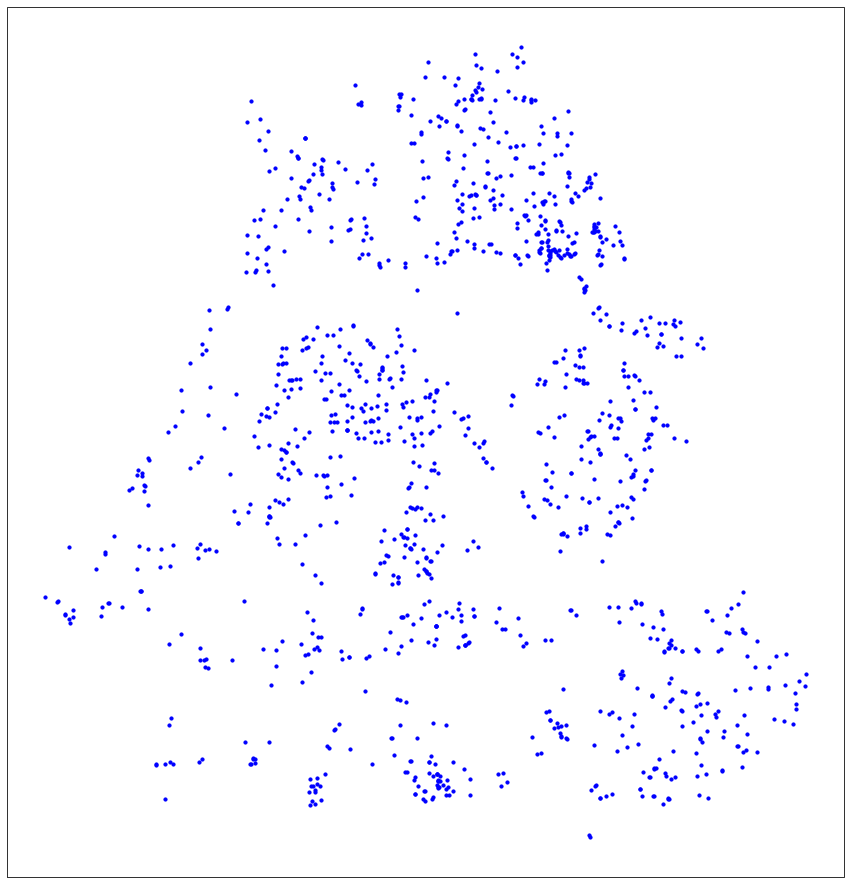

In [10]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Puntos Melbourne
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [11]:
#Se carga la cartografía de Melbourne
url = 'https://foscal.net/cartografia/'
#url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp", "68276_urbano.shx"]
#file_list = ["melbourne-metro-region.dbf", "melbourne-metro-region.prj", "melbourne-metro-region.shp", "melbourne-metro-region.shx"]
#file_list = ["UrbanExtent2015_region.dbf", "UrbanExtent2015_region.prj", "UrbanExtent2015_region.shp", "UrbanExtent2015_region.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

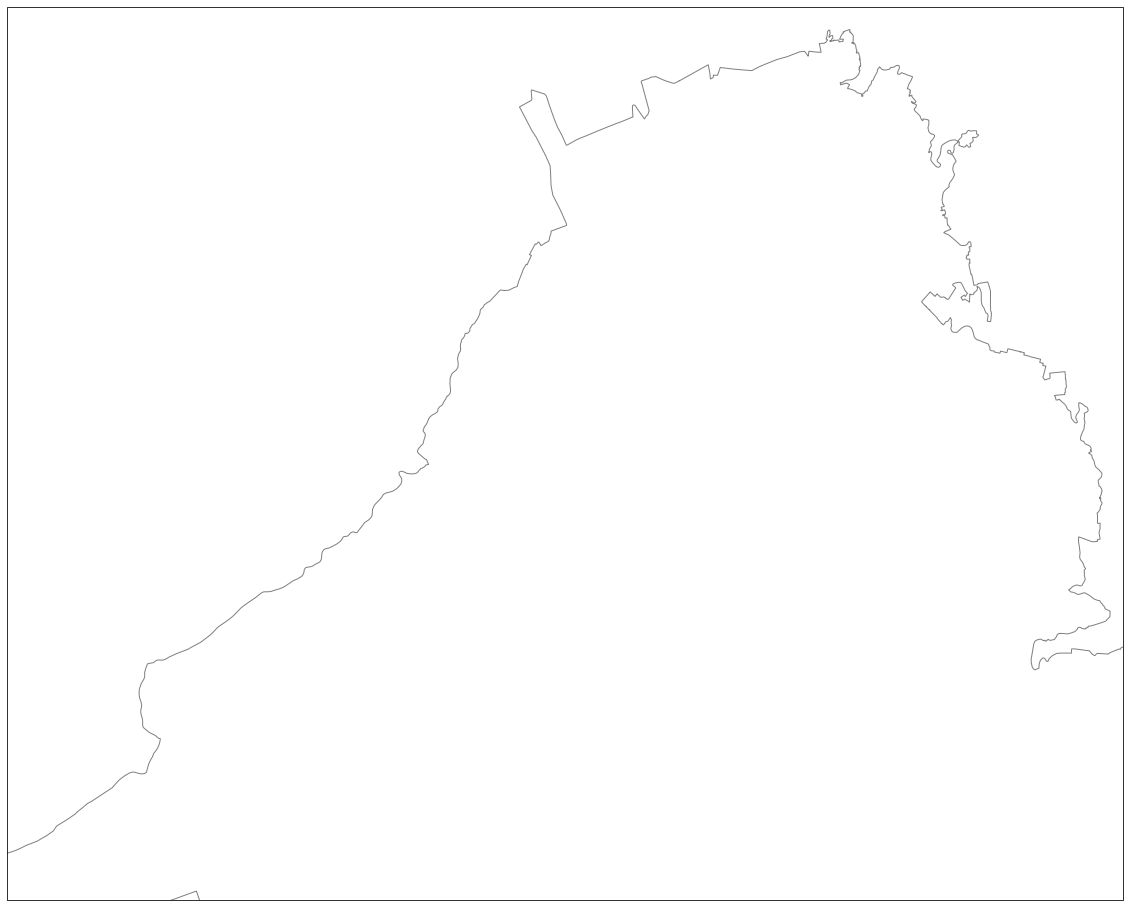

In [12]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)

# Mapa de Melbourne
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

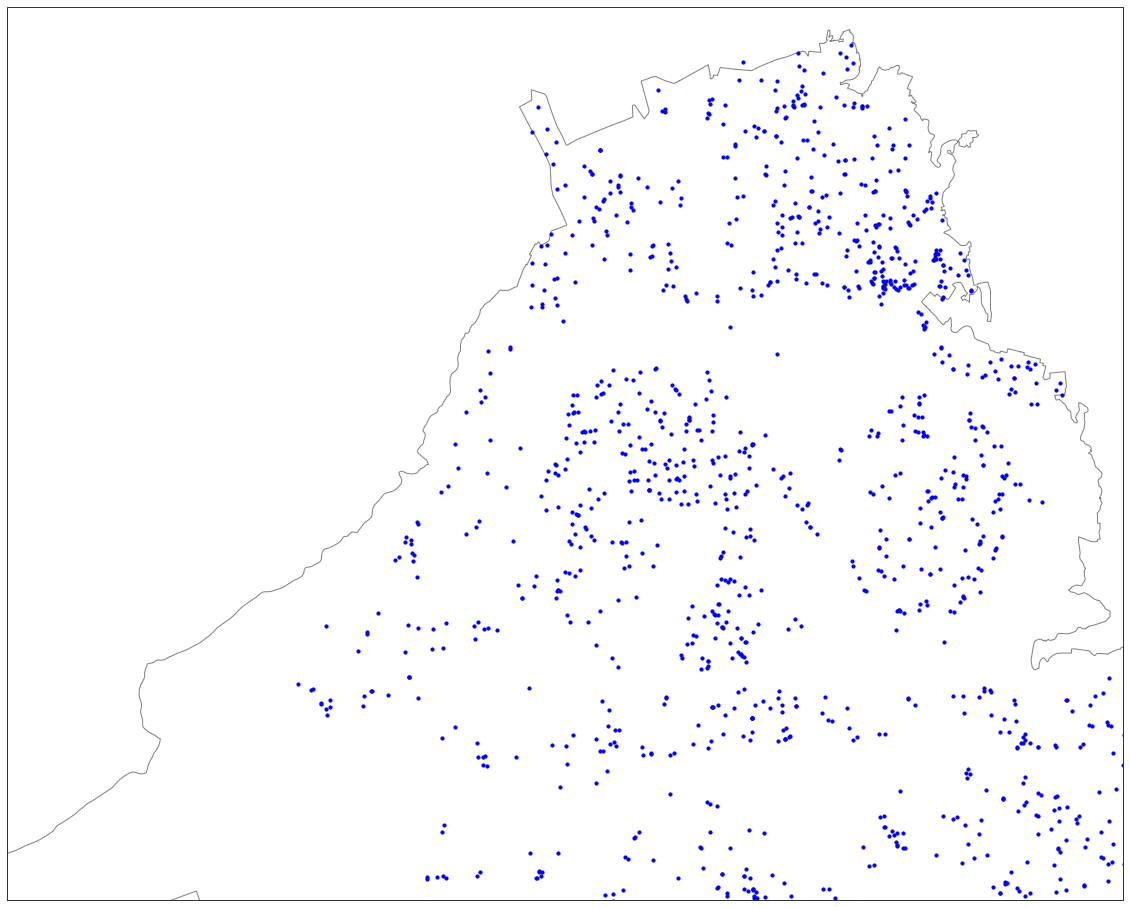

In [13]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)

# Puntos y mapa de Melbourne
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [14]:
floridablanca = gpd.read_file("68276_urbano.shp")
floridablanca = floridablanca.to_crs("EPSG:32618")
area_floridablanca = floridablanca.area.sum()
print(f"El área de Floridablanca es de {area_floridablanca:.2f} metros cuadrados")


El área de Floridablanca es de 17030066.99 metros cuadrados


In [15]:
listapuntos5=[]
for i in range(df.shape[0]):
  listapuntos5.append((df["x"][i],df["y"][i]))

  

In [16]:
len(listapuntos5)

1262

In [17]:
from shapely.geometry import Point
from shapely.ops import nearest_points
from itertools import combinations

#listapuntos = [(x, y) for x, y in zip(df['x'], df['y'])]

#puntos = [Point(c) for c in listapuntos]

#parejas = list(combinations(puntos, 2))

#parejas_cercanas = []
#for p1, p2 in parejas:
    ##if p1.distance(p2) <= 100:
        #parejas_cercanas.append((p1.coords[0], p2.coords[0]))#

#len(parejas_cercanas)




In [18]:
from scipy.spatial.distance import pdist, squareform

coords = np.column_stack((df['x'], df['y']))

dist_matrix = squareform(pdist(coords))

mask = dist_matrix < 100

num_pairs = np.sum(mask) // 2 
print(num_pairs)

4257


In [19]:
def calcular_distancia(x1, y1, x2, y2):
    distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distancia

In [20]:
def funcionk(listaPuntos, area, h):
  contK=0
  for i in range(len(listaPuntos)-1):
    for j in range(i+1,len(listaPuntos)):
      if calcular_distancia(listaPuntos[i][0],listaPuntos[i][1],listaPuntos[j][0],listaPuntos[j][1])<=h:
        contK+=1
  valorK=contK*area/len(listaPuntos)**2
  return valorK 
  
funcionk(listapuntos5,area_floridablanca,100)

38772.64655741063

In [21]:

lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

import numpy as np

lower_lon, lower_lat, upper_lon, upper_lat = floridablanca.total_bounds
num_points = 1000

random_points = []
while len(random_points) < num_points:
    point = [np.random.uniform(upper_lon, lower_lon), np.random.uniform(lower_lat, upper_lat)]
    random_points.append(point)



In [22]:
def filter_points_within_polygon(polygon, points):
    filtered_points = []
    for point in points:
        if polygon.contains(Point(point)):
            filtered_points.append(point)
    return filtered_points

filtered_points = filter_points_within_polygon(floridablanca.geometry[0], random_points)

In [23]:
from shapely.geometry import Point

points_gdf = gpd.GeoDataFrame(geometry=[Point(point) for point in filtered_points])
points_gdf['id'] = range(len(points_gdf))

<Axes: >

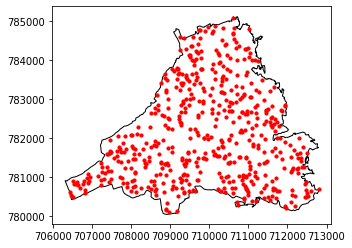

In [24]:
ax = floridablanca.plot(color='white', edgecolor='black')
points_gdf.plot(ax=ax, color='red', markersize=10)

In [25]:
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

In [26]:
import pyproj

p = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [27]:
xmin,ymin = p(lower_lon, lower_lat)
xmax, ymax = p(upper_lon, upper_lat)

In [28]:
xmin,ymin,xmax,ymax

(706552.7316262802, 780796.0652021945, 712059.2439258386, 785242.8333012793)

In [29]:
import shapely.geometry as sg


In [30]:
from shapely.geometry import Polygon
coordenadas = floridablanca.geometry[0]
poligono = Polygon(coordenadas)
listagruporam1=[]
for i in range(9):
    group = []
    i = 0
while i < len(listapuntos5):
    random_easting = np.random.uniform(xmin, xmax)
    random_northing = np.random.uniform(ymin, ymax)
    point = Point(random_easting, random_northing)
    if point.within(poligono):
        group.append((random_easting, random_northing))
        i += 1

listagruporam1.append(group)

In [31]:

df_grupo1 = pd.DataFrame(listagruporam1[0], columns=['x', 'y'])

df_grupo1['longitud'],df_grupo1['latitud']=p(df_grupo1['x'],df_grupo1['y'],inverse=True)

df_grupo1

,x,y,longitud,latitud
0,708976.966038,781255.408221,-73.108044,7.064064
1,711343.732232,783227.089096,-73.086551,7.081803
2,709105.889663,782215.830128,-73.106842,7.072743
3,707707.342192,782161.324811,-73.119501,7.072301
4,708578.916199,781201.782076,-73.111648,7.063594
...,...,...,...,...
1257,710367.690066,781705.667944,-73.095441,7.068084
1258,709269.154674,782325.234543,-73.105360,7.073726
1259,710704.350073,784483.067765,-73.092291,7.093182
1260,710293.336697,782195.029485,-73.096096,7.072511


In [32]:
from pandas.compat import F
listaDatos=[]
for D in range(10,201,10):
    k = funcionk(listapuntos5,area_floridablanca,D)
    listak=[]
    for group in listagruporam1:
        listak.append(funcionk(group,area_floridablanca,D))
    listak.append(k)
    listak.sort()

    percentile_2_5 = np.percentile(listak, 2.5)
    percentile_97_5 = np.percentile(listak, 97.5)
    listaDatos.append([D, k,percentile_2_5, percentile_97_5])

In [33]:
dfresultados=pd.DataFrame(listaDatos,columns=('D','k','percentile_2_5', 'percentile_97_5'))
dfresultados

,D,k,percentile_2_5,percentile_97_5
0,10,1999.582158,258.502132,1954.939081
1,20,3977.778411,850.089741,3897.581266
2,30,6469.236395,1736.000874,6347.871381
3,40,9516.727919,3230.073692,9355.531657
4,50,13237.875466,5303.971872,13034.442040
5,60,17718.222655,7490.680703,17455.977989
6,70,22679.752716,9772.824137,22348.805829
7,80,27726.826399,12651.367009,27340.276158
8,90,33041.223900,16047.448792,32605.486077
9,100,38772.646557,19339.274287,38274.354961


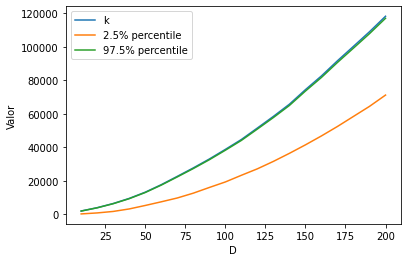

In [34]:
df = pd.DataFrame(listaDatos, columns=['D', 'k', 'percentile_2_5', 'percentile_97_5'])

# Creamos la visualización
plt.plot(df['D'], df['k'], label='k')
plt.plot(df['D'], df['percentile_2_5'], label='2.5% percentile')
plt.plot(df['D'], df['percentile_97_5'], label='97.5% percentile')
plt.xlabel('D')
plt.ylabel('Valor')
plt.legend()
plt.show()

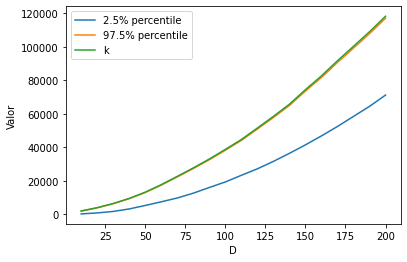

In [35]:
# Creamos la visualización
plt.plot(df['D'], df['percentile_2_5'], label='2.5% percentile')
plt.plot(df['D'], df['percentile_97_5'], label='97.5% percentile', zorder=1) # Añadir zorder=1
plt.plot(df['D'], df['k'], label='k', zorder=2) # Añadir zorder=2
plt.xlabel('D')
plt.ylabel('Valor')
plt.legend()
plt.show()


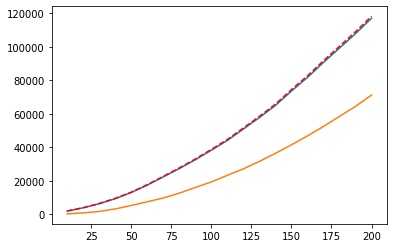

In [36]:
plt.plot(df['D'], df['percentile_97_5'], label='97.5% percentile')
plt.plot(df['D'], df['k'], label='k', linestyle='--', color='red')
plt.plot(df['D'], df['percentile_2_5'], label='2.5% percentile')


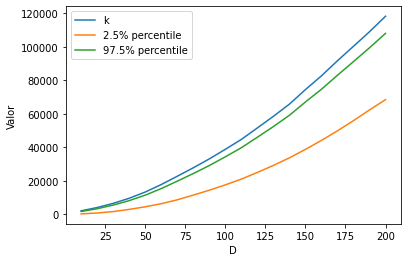

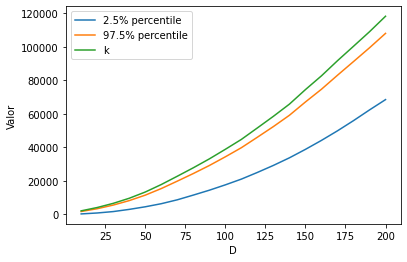

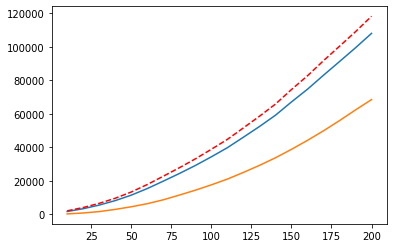

In [37]:
import pyproj
import shapely.geometry as sg
from shapely.geometry import Polygon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)
xmin,ymin = p(lower_lon, lower_lat)
xmax, ymax = p(upper_lon, upper_lat)

coordenadas = floridablanca.geometry[0]
poligono = Polygon(coordenadas)

listagruporam1=[]
for i in range(9):
    group = []
    i = 0
    while i < len(listapuntos5):
        random_easting = np.random.uniform(xmin, xmax)
        random_northing = np.random.uniform(ymin, ymax)
        point = Point(random_easting, random_northing)
        if point.within(poligono):
            group.append((random_easting, random_northing))
            i += 1
    listagruporam1.append(group)

df_grupo1 = pd.DataFrame(listagruporam1[0], columns=['x', 'y'])
df_grupo1['longitud'],df_grupo1['latitud']=p(df_grupo1['x'],df_grupo1['y'],inverse=True)

listaDatos=[]
for D in range(10,201,10):
    k = funcionk(listapuntos5,area_floridablanca,D)
    listak=[]
    for group in listagruporam1:
        listak.append(funcionk(group,area_floridablanca,D))
    listak.append(k)
    listak.sort()

    percentile_2_5 = np.percentile(listak, 2.5)
    percentile_97_5 = np.percentile(listak, 97.5)
    listaDatos.append([D, k,percentile_2_5, percentile_97_5])

dfresultados=pd.DataFrame(listaDatos,columns=('D','k','percentile_2_5', 'percentile_97_5'))
dfresultados

df = pd.DataFrame(listaDatos, columns=['D', 'k', 'percentile_2_5', 'percentile_97_5'])

# Creamos la visualización
plt.plot(df['D'], df['k'], label='k')
plt.plot(df['D'], df['percentile_2_5'], label='2.5% percentile')
plt.plot(df['D'], df['percentile_97_5'], label='97.5% percentile')
plt.xlabel('D')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Creamos la visualización
plt.plot(df['D'], df['percentile_2_5'], label='2.5% percentile')
plt.plot(df['D'], df['percentile_97_5'], label='97.5% percentile', zorder=1) # Añadir zorder=1
plt.plot(df['D'], df['k'], label='k', zorder=2) # Añadir zorder=2
plt.xlabel('D')
plt.ylabel('Valor')
plt.legend()
plt.show()

plt.plot(df['D'], df['percentile_97_5'], label='97.5% percentile')
plt.plot(df['D'], df['k'], label='k', linestyle='--', color='red')
plt.plot(df['D'], df['percentile_2_5'], label='2.5% percentile')

In [38]:
print(df_grupo1)
print(dfresultados)

                  x              y   longitud   latitud
0     709269.911625  781101.940393 -73.105398  7.062666
1     710536.054642  781249.982731 -73.093934  7.063958
2     710366.490415  780944.467001 -73.095480  7.061202
3     711733.481541  782987.211697 -73.083033  7.079619
4     710351.300515  784685.855156 -73.095479  7.095028
...             ...            ...        ...       ...
1257  707399.234773  781901.148569 -73.122299  7.069960
1258  709890.885839  782732.320491 -73.099718  7.077383
1259  711089.410241  782576.154709 -73.088877  7.075927
1260  711787.696370  782622.132015 -73.082556  7.076317
1261  708670.857416  783075.551646 -73.110747  7.080532

[1262 rows x 4 columns]
      D              k  percentile_2_5  percentile_97_5
0    10    1999.582158      160.394291      1605.012203
1    20    3977.778411      716.427832      3263.221846
2    30    6469.236395     1557.695887      5437.099134
3    40    9516.727919     2867.047948      8111.673932
4    50   13237.875466 

In [39]:
listaDatos=[]
k_values_by_group = []
for D in range(10,201,10):
    k = funcionk(listapuntos5,area_floridablanca,D)
    listak=[]
    group_k_values = []
    for i, group in enumerate(listagruporam1):
        group_k = funcionk(group,area_floridablanca,D)
        listak.append(group_k)
        group_k_values.append(group_k)
    k_values_by_group.append(group_k_values)
    listak.append(k)
    listak.sort()

    percentile_2_5 = np.percentile(listak, 2.5)
    percentile_97_5 = np.percentile(listak, 97.5)
    listaDatos.append([D, k,percentile_2_5, percentile_97_5])

dfresultados=pd.DataFrame(listaDatos,columns=('D','k','percentile_2_5', 'percentile_97_5'))
dfresultados

# Create a data frame to display the k values for each group
group_columns = ['Group {}'.format(i+1) for i in range(len(listagruporam1))]
df_k_values_by_group = pd.DataFrame(k_values_by_group, columns=group_columns)
df_k_values_by_group

,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9
0,224.552007,235.244960,245.937913,160.394291,160.394291,160.394291,192.473149,160.394291,192.473149
1,759.199643,759.199643,769.892596,737.813738,801.971454,716.427832,801.971454,716.427832,727.120785
2,1742.951293,1881.959678,1593.249955,1582.557002,1700.179482,1636.021766,1689.486530,1700.179482,1550.478144
3,3004.719714,3272.043532,2908.483139,2972.640856,3186.499910,2951.254950,2855.018376,3015.412667,2961.947903
4,4854.600534,4961.530061,4822.521676,4416.189473,4619.355574,4565.890811,4426.882425,4565.890811,4790.442818
5,6939.726314,7003.884031,6886.261551,6212.605529,6757.946118,6790.024976,6437.157537,6490.622300,6971.805172
6,9484.649061,9634.350399,9484.649061,8554.362175,8917.922567,9174.553433,8725.449418,8875.150756,9281.482960
7,12050.957714,12457.289917,12382.439248,11377.301693,11516.310078,11944.028187,11580.467794,11762.247990,12168.580194
8,15087.756286,15440.623726,15451.316678,14392.714359,14317.863690,14799.046562,14349.942548,14702.809988,15183.992860
9,18830.289737,18701.974305,18616.430683,17579.214269,17728.915607,17996.239425,17515.056553,18071.090094,18755.439068
